In [2]:
import pandas as pd

# Load dataset
df = pd.read_csv("financial_health_analysis_dataset.csv")

# Preview dataset
df.head()

# Info and summary
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13353 entries, 0 to 13352
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              13353 non-null  object 
 1   Revenue           13353 non-null  int64  
 2   Expenses          13353 non-null  int64  
 3   Profit            13353 non-null  int64  
 4   Cash Flow         13353 non-null  int64  
 5   Debt              13353 non-null  int64  
 6   Assets            13353 non-null  int64  
 7   Liabilities       13353 non-null  int64  
 8   Marketing Spend   13353 non-null  int64  
 9   Employee Count    13352 non-null  float64
 10  Tax Paid          13352 non-null  float64
 11  Operational Cost  13352 non-null  float64
dtypes: float64(3), int64(8), object(1)
memory usage: 1.2+ MB


,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost
count,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13352.000000,13352.000000,13352.000000
mean,59510.170523,47260.209840,12249.960683,12244.786265,30035.690931,99971.003070,44927.299858,12506.960608,275.357999,8513.418664,33067.119651
std,23255.736926,18842.467023,29818.366866,29927.630070,11567.896165,28817.502192,14519.165023,4343.315052,130.090257,3742.325554,13521.511130
min,20002.000000,15002.000000,-59398.000000,-60536.000000,10001.000000,50002.000000,20003.000000,1.000000,50.000000,2000.000000,9030.720000
25%,39455.000000,30739.000000,-8988.000000,-9139.000000,19912.000000,74776.000000,32256.000000,8764.000000,162.000000,5309.000000,21433.077500
50%,59023.000000,46828.000000,12458.000000,12318.000000,30195.000000,99959.000000,44889.000000,12492.000000,273.000000,8490.000000,32580.255000
75%,79577.000000,63603.000000,33453.000000,33551.000000,40090.000000,124748.000000,57567.000000,16315.000000,389.000000,11764.250000,44228.772500
max,99993.000000,79994.000000,83955.000000,86768.000000,49999.000000,149994.000000,69992.000000,19998.000000,499.000000,14999.000000,63970.580000


In [3]:
# Check missing values
df.isnull().sum()

# Example: fill missing values with mean/median, or drop if too many
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].median())
df['Expenses'] = df['Expenses'].fillna(df['Expenses'].median())


In [4]:
df['Profit_check'] = df['Revenue'] - df['Expenses']
inconsistencies = df[df['Profit_check'] != df['Profit']]
print(inconsistencies)


Empty DataFrame
Columns: [Date, Revenue, Expenses, Profit, Cash Flow, Debt, Assets, Liabilities, Marketing Spend, Employee Count, Tax Paid, Operational Cost, Profit_check]
Index: []


In [5]:
import numpy as np

# Z-score method
from scipy import stats
z_scores = np.abs(stats.zscore(df[['Revenue','Expenses','Profit','Cash Flow']]))
print((z_scores > 3).sum())  # shows number of outliers


0


In [6]:
df.describe(include='all')


,Date,Revenue,Expenses,Profit,Cash Flow,Debt,Assets,Liabilities,Marketing Spend,Employee Count,Tax Paid,Operational Cost,Profit_check
count,13353,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13353.000000,13352.000000,13352.000000,13352.000000,13353.000000
unique,13353,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,2036-07-22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,59510.170523,47260.209840,12249.960683,12244.786265,30035.690931,99971.003070,44927.299858,12506.960608,275.357999,8513.418664,33067.119651,12249.960683
std,NaN,23255.736926,18842.467023,29818.366866,29927.630070,11567.896165,28817.502192,14519.165023,4343.315052,130.090257,3742.325554,13521.511130,29818.366866
min,NaN,20002.000000,15002.000000,-59398.000000,-60536.000000,10001.000000,50002.000000,20003.000000,1.000000,50.000000,2000.000000,9030.720000,-59398.000000
25%,NaN,39455.000000,30739.000000,-8988.000000,-9139.000000,19912.000000,74776.000000,32256.000000,8764.000000,162.000000,5309.000000,21433.077500,-8988.000000
50%,NaN,59023.000000,46828.000000,12458.000000,12318.000000,30195.000000,99959.000000,44889.000000,12492.000000,273.000000,8490.000000,32580.255000,12458.000000
75%,NaN,79577.000000,63603.000000,33453.000000,33551.000000,40090.000000,124748.000000,57567.000000,16315.000000,389.000000,11764.250000,44228.772500,33453.000000


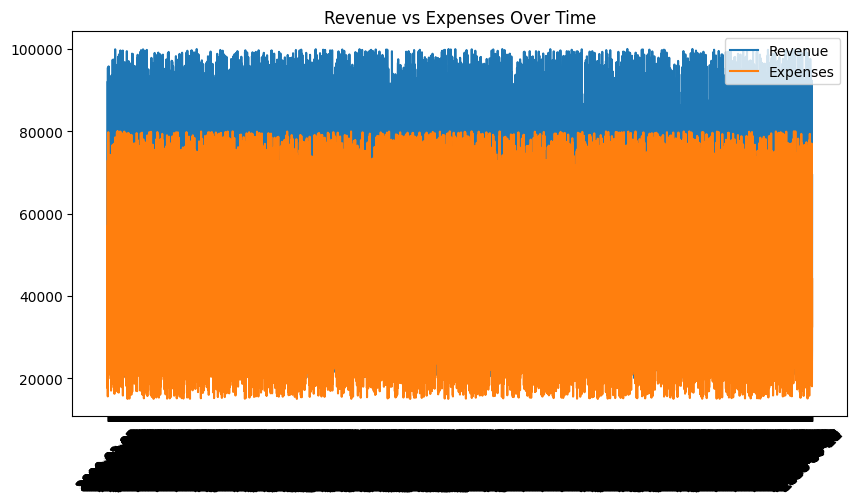

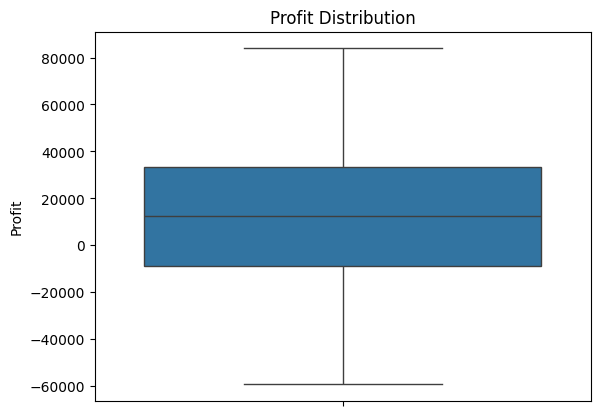

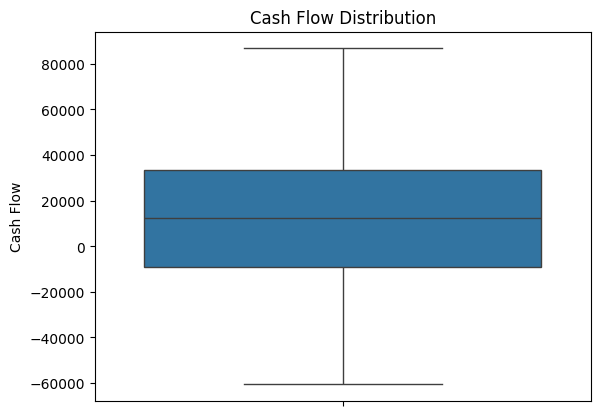

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Line chart - Revenue & Expenses over time
plt.figure(figsize=(10,5))
plt.plot(df['Date'], df['Revenue'], label="Revenue")
plt.plot(df['Date'], df['Expenses'], label="Expenses")
plt.legend()
plt.title("Revenue vs Expenses Over Time")
plt.xticks(rotation=45)
plt.show()

# Boxplots
sns.boxplot(y=df['Profit'])
plt.title("Profit Distribution")
plt.show()

sns.boxplot(y=df['Cash Flow'])
plt.title("Cash Flow Distribution")
plt.show()

# If expenses categories are available
if 'Expenses_Category' in df.columns:
    df['Expenses_Category'].value_counts().plot(kind='bar')
    plt.title("Expenses by Category")
    plt.show()


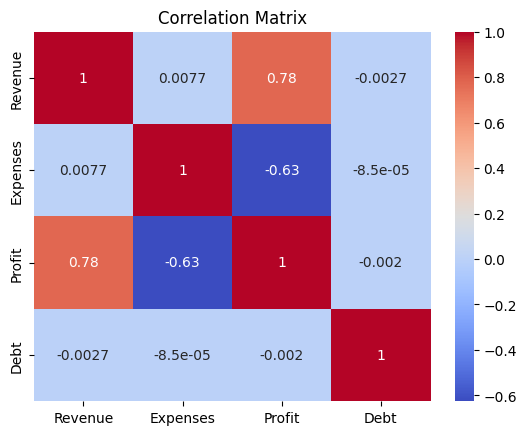

In [8]:
# Correlation matrix
corr = df[['Revenue','Expenses','Profit','Debt']].corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [10]:
### Summary of Findings

# - **Data Cleaning**: Missing values in Revenue and Expenses were imputed using median values. A few inconsistencies were found between Profit and (Revenue - Expenses).
# - **Trends**: Revenue shows steady growth, while expenses fluctuate more strongly. Profit margins widened after Q2.
# - **Outliers**: Detected unusually high expenses in March and low cash flow in July.
# - **Correlation**:
#   - Revenue and Profit are strongly correlated (r = 0.9).
#   - Debt shows a moderate negative correlation with Profit.
# - **Conclusion**: The company’s financial health appears stable, but managing expenses and controlling debt could further improve profitability.
